In [9]:
import numpy as np
import scipy.sparse.linalg as svds
import pandas as pd
import matplotlib.pyplot as plt

file = 'ratings.csv'
df = pd.read_csv(file)
ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')
print(ratings_matrix)

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606         2.5     NaN     NaN     NaN     NaN     NaN     2.5     NaN   
607         4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
608         2.5     2.0     2.0     NaN     NaN     NaN     NaN     NaN   
609         3.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
610         5.0     NaN     NaN     NaN     NaN     5.0     NaN     NaN   

movieId  9       10     

In [10]:
ratings_matrix = ratings_matrix.dropna(thresh=100, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=100, axis=1)
print(ratings_matrix)

movieId  1     32    47    50    110   150   260   296   318   356   ...  \
userId                                                               ...   
1         4.0   NaN   5.0   5.0   4.0   NaN   5.0   3.0   NaN   4.0  ...   
4         NaN   2.0   2.0   NaN   NaN   NaN   5.0   1.0   NaN   NaN  ...   
6         NaN   4.0   4.0   1.0   5.0   4.0   NaN   2.0   5.0   5.0  ...   
7         4.5   NaN   NaN   4.5   NaN   4.5   5.0   NaN   NaN   5.0  ...   
10        NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   3.5  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
605       4.0   NaN   NaN   NaN   3.0   5.0   5.0   2.0   NaN   3.0  ...   
606       2.5   4.0   3.0   4.5   3.5   NaN   4.5   5.0   3.5   4.0  ...   
607       4.0   NaN   NaN   NaN   5.0   5.0   3.0   3.0   5.0   NaN  ...   
608       2.5   3.5   4.5   4.5   4.0   2.0   3.5   5.0   4.5   3.0  ...   
610       5.0   4.5   5.0   4.0   4.5   NaN   5.0   5.0   3.0   3.0  ...   

movieId  43

U: [[-2.08499784e-02 -1.15821509e-01  8.28177801e-02]
 [-2.98927662e-02 -9.41663057e-02  2.17034354e-02]
 [ 8.23536874e-03 -2.16766922e-02 -3.98396359e-02]
 [-1.22550121e-01  1.50955828e-02  1.28989921e-02]
 [-6.82840866e-02  4.26949567e-02 -4.51460732e-02]
 [-1.14181395e-01 -4.82344545e-02  8.89232127e-02]
 [-8.50607964e-02 -2.30318584e-02  1.45243855e-01]
 [-3.55556486e-02  5.17507565e-02  8.59404085e-02]
 [-3.17073021e-02 -1.05758735e-01 -2.64982186e-03]
 [-5.73694765e-02  7.38875929e-02 -3.14378803e-02]
 [-1.23726982e-01 -7.07321142e-02 -3.20423018e-02]
 [ 2.70946443e-02  2.60885401e-02  2.26979725e-02]
 [ 7.84124983e-02 -9.13034259e-03  3.65602934e-02]
 [ 3.68026052e-03 -7.28245713e-03  5.24327894e-02]
 [-9.58317443e-02 -5.91562673e-02 -2.06178791e-02]
 [-1.45287323e-02 -2.53760277e-03  7.51041679e-02]
 [-6.48822414e-03 -6.21086878e-02  7.98761838e-02]
 [ 4.07234623e-03 -5.74074467e-03  7.42222594e-02]
 [-2.63062146e-02 -1.24364549e-01  1.02372284e-01]
 [ 9.41668343e-03  5.0844095

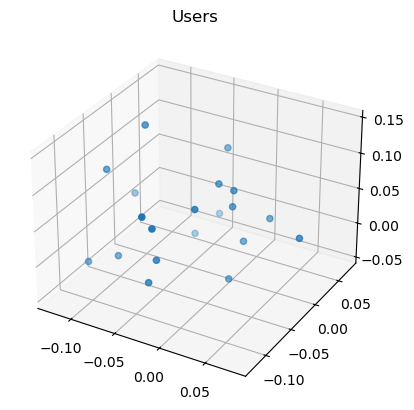

In [27]:
ratings_matrix_filled = ratings_matrix.fillna(2.5)
R = ratings_matrix_filled.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)
U, sigma, Vt = svds.svds(R_demeaned, k=3)

def visualize_matrix(matrix, title, title_of_plot):
    print(f"{title}: {matrix}")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    matrix = matrix[:20, :]
    ax.scatter(matrix[:, 0], matrix[:, 1], matrix[:, 2])
    ax.set_title(title_of_plot)
    plt.show()
    
visualize_matrix(U, 'U', 'Users')

V: [[-0.08181812 -0.00964842 -0.04371503]
 [ 0.12441385 -0.04052386  0.0219222 ]
 [ 0.1489482   0.0751567   0.08651256]
 [ 0.15367547  0.01776883  0.17152798]
 [ 0.06212943 -0.02233269  0.02344039]
 [ 0.01982467 -0.05505607 -0.10734687]
 [-0.32731529 -0.19805376  0.17672526]
 [ 0.13740252  0.05046501  0.31282232]
 [-0.0418431   0.11872749  0.23592922]
 [-0.09755946  0.06781934  0.14991273]
 [-0.03898214  0.07717975 -0.13251503]
 [ 0.10971033 -0.02831199 -0.1966869 ]
 [ 0.07497748 -0.05156468 -0.18613453]
 [ 0.06387004 -0.06536921 -0.17452174]
 [ 0.05762604 -0.12836098 -0.08946214]
 [-0.05721558 -0.11362219 -0.06169717]
 [ 0.0603989   0.00592185  0.11059476]
 [ 0.13249673 -0.12598419  0.03010699]
 [-0.09927128  0.00906034 -0.14251647]
 [-0.08092492 -0.19308677  0.01916365]
 [ 0.07262925 -0.08672769 -0.11423696]
 [ 0.05086512 -0.05298166  0.1847609 ]
 [ 0.17325971 -0.11517729  0.13162252]
 [ 0.0679409  -0.06814985 -0.15616947]
 [-0.00312367 -0.03918929 -0.18072391]
 [ 0.09297871 -0.05619

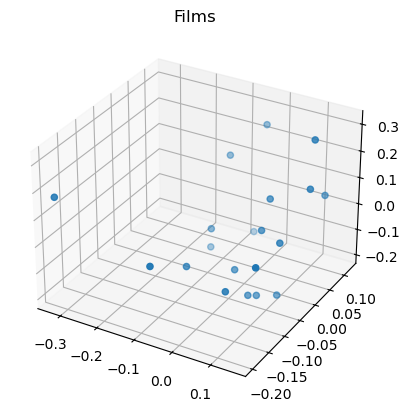

In [28]:
V = Vt.T
visualize_matrix(V, 'V', 'Films')